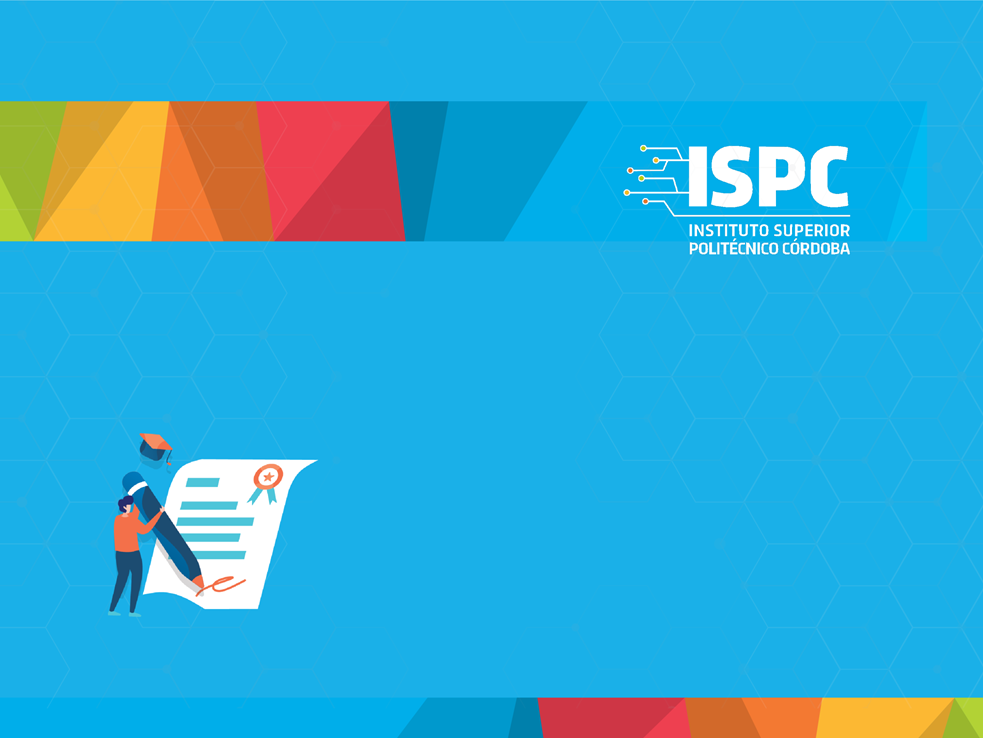

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


Viviana Farabollini

Trabajaremos con el conjunto de datos "Breast Cancer Wisconsin". Importaremos los datos y crearemos un modelo ML simple que puede clasificar los escaneos de cáncer como malignos o benignos. 

No falta ningún valor, todas las columnas tienen 569 valores. 
Todos los tipos de datos son numéricos. 

El modelo lineal clasifica las exploraciones de cáncer con un 90 % de precisión y con Random Forests Classifiers de 89%.

In [1]:
# Tratamiento de datos
# ==============================================================================
import warnings
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
warnings.filterwarnings('ignore')


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI

datos = datasets.load_breast_cancer()

y = datos.target


In [3]:
datos.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
df_cancer= pd.DataFrame(datos.data, columns=datos.feature_names)

In [5]:
df_cancer.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
cancer = pd.DataFrame(
    {'radius': df_cancer['mean radius'], 'texture': df_cancer['mean texture']})
cancer.head()


,radius,texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [7]:
cancer.shape


(569, 2)

In [8]:

# División de los datos en train y test
# ==============================================================================

X = cancer
y = datos.target
#PONER CODIGO AQUI


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42,
    shuffle=True)


In [9]:

# Creación del modelo SVM lineal
# ==============================================================================
modelo_linear = SVC(C=100, kernel='linear', random_state=42)
modelo_linear.fit(X_train, y_train)


SVC(C=100, kernel='linear', random_state=42)

In [10]:
X.shape


(569, 2)

In [11]:
y.shape


(569,)

Text(0.5, 1.0, 'Resultados clasificación SVM lineal')

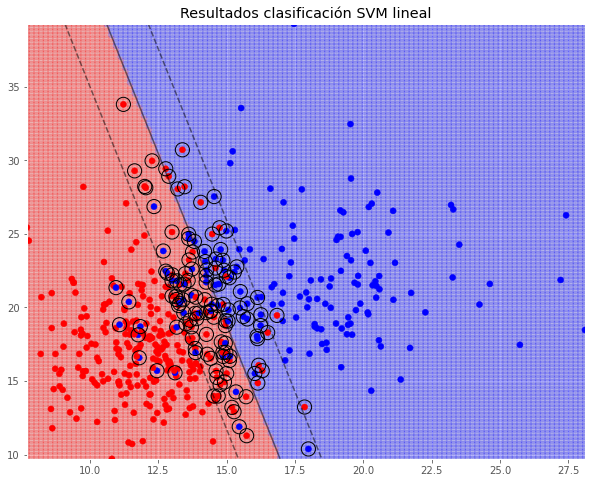

In [12]:
# Representación gráfica de los límites de clasificación


# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.radius), np.max(X_train.radius), 120)
y = np.linspace(np.min(X_train.texture), np.max(X_train.texture), 120)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo_linear.predict(grid)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2)
ax.scatter(X_train.radius, X_train.texture, c=y_train, alpha=1)

# Vectores soporte
ax.scatter(
    modelo_linear.support_vectors_[:, 0],
    modelo_linear.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo_linear.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal")


In [13]:
# Predicciones test
# ==============================================================================

#PONER CODIGO AQUI
predicciones = modelo_linear.predict(X_test)
predicciones


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [18]:
# Accuracy de test del modelo
# ==============================================================================

#PONER CODIGO AQUI
accuracy = accuracy_score(
    y_true=y_test,
    y_pred=predicciones,
    normalize=True)
print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 90.35087719298247%


In [19]:
from sklearn.metrics import confusion_matrix, classification_report


In [20]:
X_test_prediction = modelo_linear.predict(X_test)

print(classification_report(y_test,X_test_prediction ))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [21]:
print(confusion_matrix(y_test, X_test_prediction))


[[36  7]
 [ 4 67]]


Random Forests Classifiers 

In [22]:
#Importamos Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create el Clasificador
clf=RandomForestClassifier(n_estimators=100, random_state=42)

#Entrenamos el modelo usando los conjuntos de entrenamiento y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [23]:
#Importamos scikit-learn metrics modulo para calcular accuracy 
from sklearn import metrics
# ¿Con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8947368421052632


In [24]:
# Predecimos predecir qué tipo de cancer es.
clf.predict([[0.3, 0.55]])


array([1])

In [25]:
X_test_prediction_rfc = clf.predict(X_test)


In [26]:
print(classification_report(y_test,X_test_prediction_rfc))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.92      0.92      0.92        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



AttributeError: 'RandomForestClassifier' object has no attribute 'support_vectors_'

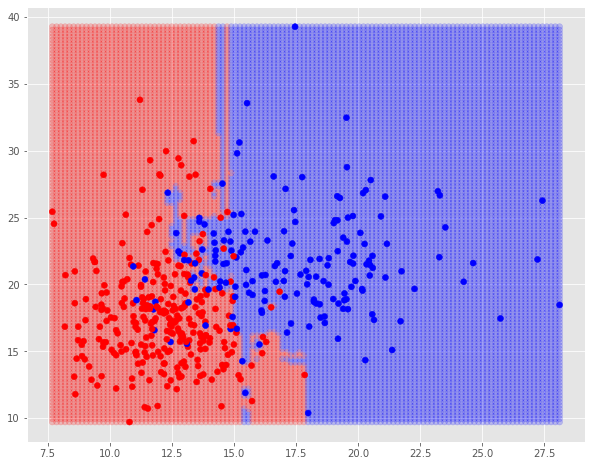

In [28]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.radius), np.max(X_train.radius), 120)
y = np.linspace(np.min(X_train.texture), np.max(X_train.texture), 120)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = clf.predict(grid)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2)
ax.scatter(X_train.radius, X_train.texture, c=y_train, alpha=1)

# Vectores soporte
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    clf.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial")


SVM Radial

Text(0.5, 1.0, 'Resultados clasificación SVM radial')

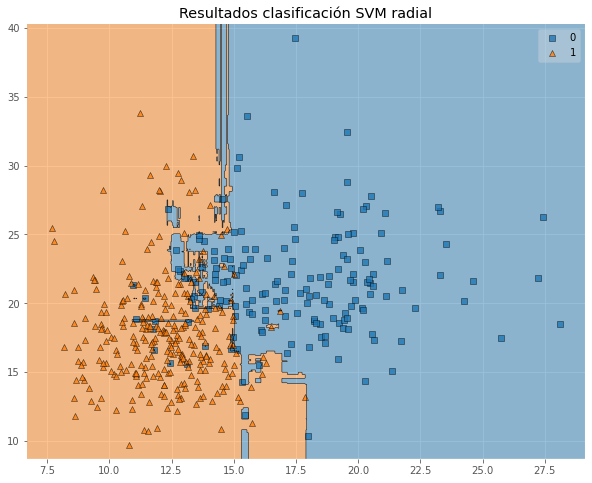

In [29]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_regions(
    X=X_train.to_numpy(),
    y=y_train.flatten(),
    clf=clf,
    ax=ax
)
ax.set_title("Resultados clasificación SVM radial")


In [30]:
# Predicciones test
# ==============================================================================
predicciones = clf.predict(X_test)
predicciones


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [31]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix


Predicción,0,1
Real,,
0,37,6
1,6,65
